<a href="https://colab.research.google.com/github/giannismantzaris-cmd/DAMA61/blob/main/Mantzaris_WA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [3]:
# Load dataset as a dataframe from the sklearn.datasets subpackage
california = fetch_california_housing(as_frame=True)
df = california.frame

In [4]:
#inspect a few initial values
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
#report df shape
df.shape

(20640, 9)

In [6]:
#check number of missing values per column
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [10]:
#report data types
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


There are no missing or categorical values in this dataset

In [11]:
#Use the MedHouseVal (median house value) as the target value and the rest of the columns of the
#dataframe as the input features.
target = "MedHouseVal"
predictors = [col for col in df.columns if col != target]

print("Target variable:", target)
print("Predictor variables:", predictors)

Target variable: MedHouseVal
Predictor variables: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [12]:
#Split the data into training (70%) and testing (30%) sets.
from sklearn.model_selection import train_test_split

X = df[predictors]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [14]:
#Apply feature scaling to standardize input variables, mean
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

We apply transformation to scale the data both on train and test set. This ensures both sets are on the same scale. But we fot the scaler only in the train set, to avoid data leackage - we act like we dont know the test set exists

In [17]:
#Train a simple Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
#make predictions
y_pred = lin_reg.predict(X_test_scaled)

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

In [20]:
mse

0.5305677824766752

In [21]:
rmse

np.float64(0.7284008391515452)

In [22]:
r2

0.5957702326061664

The Linear Regression model achieves an RMSE of 0.73, meaning the
average prediction error is about $73000.
The R2 score of 0.60 means that the model explains around 60% of the variability in median house values.

This performance is expected, as this is a simple linear model, but house prices contain also non-linear relations that the model cannot fully capture.

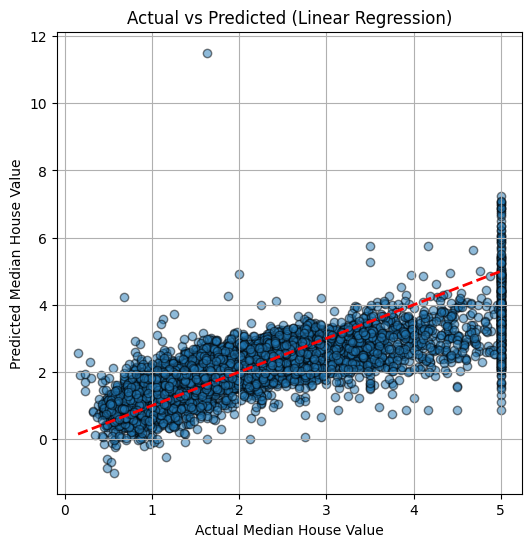

In [23]:
#plot the ground truth median house values against the predicted ones
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors="k")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.show()